In [14]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
%matplotlib inline

In [15]:
df = pd.read_csv("data4_cumm.csv")

In [16]:
df.head(1)

,PID,PCL.score,PHQ.score,SDS.score,Days.Since,Reexp1,Reexp2,Avoid1,Avoid2,NACM1,...,Reexp1_cum,Reexp2_cum,Avoid1_cum,Avoid2_cum,NACM1_cum,NACM2_cum,AAR1_cum,AAR2_cum,Sleep_cum,Pain_cum
0,202.0,25.0,7.0,0.0,2.0,2.0,3.0,3.0,3.0,2.0,...,2.0,3.0,3.0,3.0,2.0,0.0,0.0,1.0,1.0,6.0


In [17]:
X = df
columns = ['PCL.score','PHQ.score', 'SDS.score','Threshold']
#columns = ['PCL.score', 'PHQ.score', 'SDS.score', 'Days.Since','Threshold']
X = X.drop(columns, axis=1)
y = df['Threshold']

In [ ]:
# split data train 70 % and test 30 %
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Decision Tree Classifier

Accuracy is:  0.866279069767


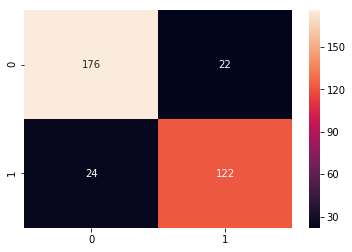

In [18]:
dtc = DecisionTreeClassifier(random_state=0)      
dtc = dtc.fit(X_train,y_train)

ac = accuracy_score(y_test,dtc.predict(X_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,dtc.predict(X_test))
sns.heatmap(cm,annot=True,fmt="d")

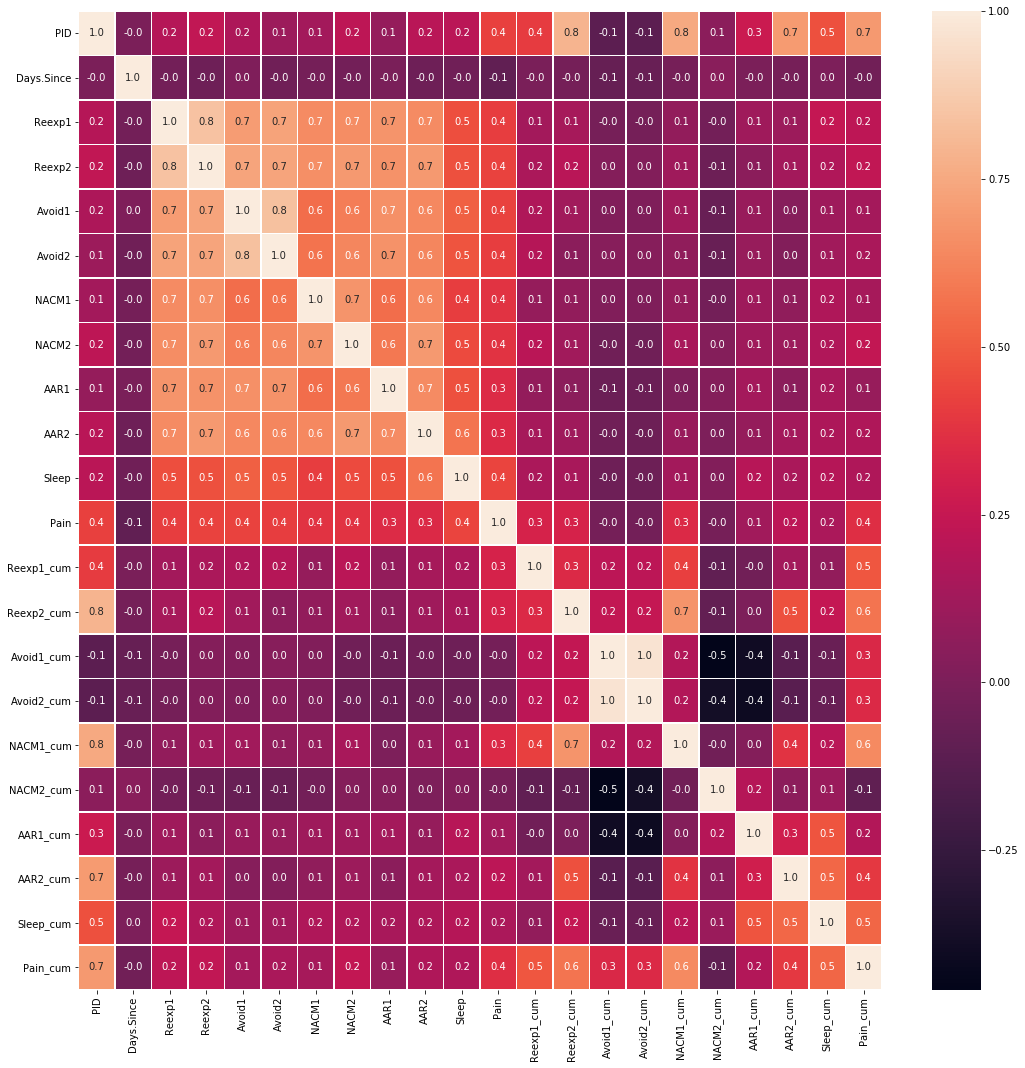

In [19]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

### Random Forest Classifier

Accuracy is:  0.936046511628


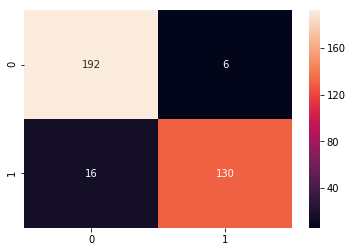

In [26]:
rfc = RandomForestClassifier(n_estimators=100,random_state=0)     
rfc = rfc.fit(X_train,y_train)

ac_rfc = accuracy_score(y_test,rfc.predict(X_test))
print('Accuracy is: ',ac_rfc)
cm_rfc = confusion_matrix(y_test,rfc.predict(X_test))
sns.heatmap(cm_rfc,annot=True,fmt="d")

In [25]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[192   6]
 [ 16 130]]
             precision    recall  f1-score   support

        0.0       0.92      0.97      0.95       198
        1.0       0.96      0.89      0.92       146

avg / total       0.94      0.94      0.94       344



### Feature importance

Feature ranking:
1. feature 0 (0.171780)
2. feature 7 (0.095489)
3. feature 6 (0.095093)
4. feature 11 (0.086711)
5. feature 9 (0.082879)
6. feature 2 (0.053870)
7. feature 10 (0.052989)
8. feature 3 (0.048402)
9. feature 4 (0.048362)
10. feature 8 (0.046538)
11. feature 1 (0.046164)
12. feature 5 (0.044242)
13. feature 16 (0.035572)
14. feature 21 (0.028153)
15. feature 12 (0.022683)
16. feature 13 (0.016758)
17. feature 19 (0.014067)
18. feature 20 (0.003146)
19. feature 18 (0.002911)
20. feature 15 (0.002166)
21. feature 14 (0.001950)
22. feature 17 (0.000077)


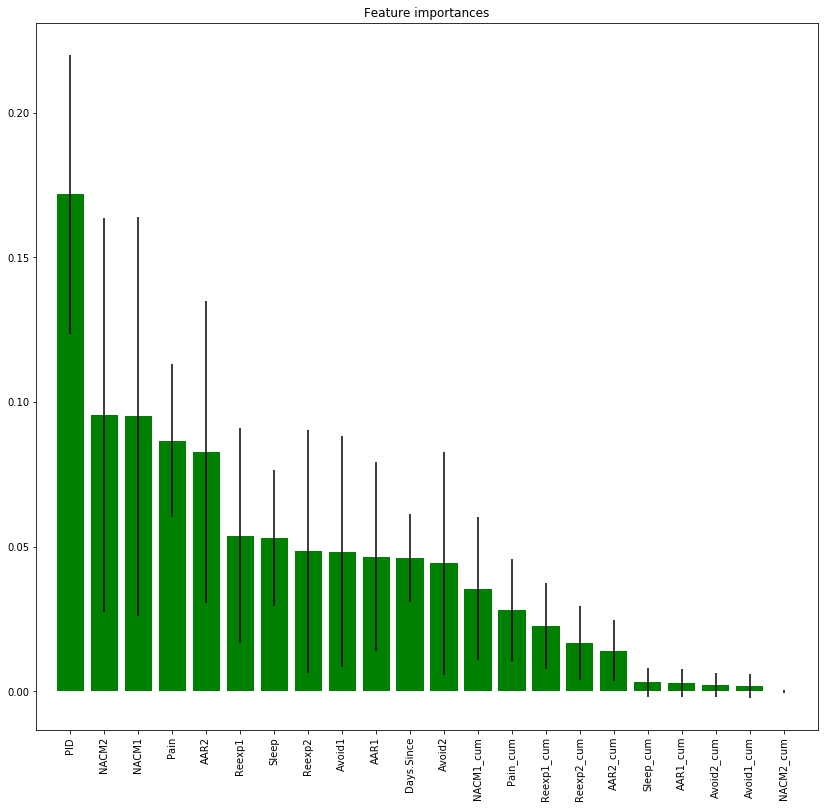

In [22]:
import numpy as np
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

### Decision tree with cross validation 

In [32]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
model = DecisionTreeClassifier(random_state=0)
y_pred = cross_val_predict(model, X, y, cv=5)
print(metrics.classification_report(y, y_pred))
print(metrics.confusion_matrix(y, y_pred))

             precision    recall  f1-score   support

        0.0       0.64      0.53      0.58       650
        1.0       0.50      0.61      0.55       494

avg / total       0.58      0.57      0.57      1144

[[345 305]
 [191 303]]


### Random Forest with cross validation

In [33]:
model = RandomForestClassifier(n_estimators=100,random_state=0)  
y_pred = cross_val_predict(model, X, y, cv=5)
print(metrics.classification_report(y, y_pred))
print(metrics.confusion_matrix(y, y_pred))

             precision    recall  f1-score   support

        0.0       0.72      0.61      0.66       650
        1.0       0.57      0.70      0.63       494

avg / total       0.66      0.65      0.65      1144

[[394 256]
 [150 344]]
